In [59]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [60]:
def mTASEP(L=10, a=0.3, b=0.3, P=0.3, timesteps=100, multi=10):
    """
    A basic TASEP(Totally Asimmetric Simple Exclusion Process) that creates a lattice(l) of lenght(L) 
    over time(timesteps) in an 2D array l. This function reads l at time t and edit time t+1.
    A ribosome or a 1 enter to l with (a) probability if the first space is empty, if there are a 1 in the first position
    is copied to t+1. The 1s moves over l with (P) probability only if there 0 in the next position so they can not move
    if there another 1 in front of them. Finally the 1s get out from l with (b) probability.
    The code is ejecuted (multi times where the final l is summed to (stored_l) and then this array is divided by m 
    to get the average ocupancy over all the positions.
    Show some relevant data.
    """
    stored_l=np.zeros((timesteps,L))
    stored_protein=np.zeros((timesteps))
    for m in range(multi):
        #lattice
        l = np.zeros((timesteps,L))
        protein=np.zeros((timesteps))
        #l[0]=np.ones((L))
        #timesteps, iterate the function over time, use t0 and modify t1
        for t in range(timesteps-1):
            #income 
            if l[t,0] == 0:
                if np.random.uniform(0,1) <= a:
                    l[t+1,0] = 1
            #copy the ones that doest move from t to t+1            
            else:
                l[t+1,0] = 1        

            #jump, for each 1 in lattice that has a 0 at the righ throw the dice and see if it can jump
            for w in range(L-1): #L-1 to not outcome without b
                if l[t,w] == 1 and l[t,w+1] == 0:    
                    if np.random.uniform(0,1) <= P:
                            l[t+1,w] = 0
                            l[t+1,w+1] = 1
                    else:
                        l[t+1,w] = 1
                elif l[t,w] == 1 and l[t,w+1] == 1:
                     l[t+1,w] = 1

            #outcome  
            if l[t,-1] == 1:
                if np.random.uniform(0,1) <= b:
                    l[t+1,-1] = 0
                    protein[t] = 1
                else:
                    l[t+1,-1] = 1   
            #End TASEP loop
        stored_l = stored_l + l
        stored_protein =stored_protein + protein
        #stored_l/m is the new work array
    #End multi loop

    #Showing Data
    plt.imshow(stored_l/(m+1))
    plt.axes().set_aspect('auto')
    plt.xlabel('Lattice Position')
    plt.ylabel('Time step')
    #plt.suptitle('Average ribosomes per lattice position over time steps ')
    #color bar
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    #cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    plt.show()

    #Tell me what's going on fast
    plt.subplot(224)
    plt.plot(np.arange(len(np.cumsum (stored_protein/m,0))), np.cumsum (stored_protein/m,0), 'r-')
    plt.axis()
    plt.yticks([0,200,400,600,800,1000])
    plt.xlabel('Time step')
    plt.ylabel('Cumulative exit ribosomes')
    
    plt.subplot(223)
    plt.plot(np.arange(len(np.mean (stored_l/m,0))), np.mean (stored_l/m,0), 'ro')
    plt.axis()
    plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    plt.xlabel('Position')
    plt.ylabel('Average ribosomes')

    plt.subplot(221)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), np.mean (stored_l/m,1), 'r-')
    plt.axis()
    plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    plt.xlabel('Time step')
    plt.ylabel('Average ribosomes/l')
    #plt.suptitle('Whats going on')

    plt.subplot(222)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), P*(np.mean (l,1))*(1-np.mean (stored_l/m,1)), 'r-')
    plt.axis()
    plt.yticks([0.0,0.05,0.1,0.15,0.20,0.25])
    plt.xlabel('Time step')
    plt.ylabel('J')
    plt.tight_layout()
    plt.show()

    print("Average flux(J) =", P*np.mean (stored_l/m,(0,1))*(1-np.mean (stored_l/m,(0,1))))
    print("Average total exit ribosomes =", np.amax(np.cumsum (stored_protein/m,0)))

SyntaxError: invalid syntax (<ipython-input-60-52591f2a5c7a>, line 62)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


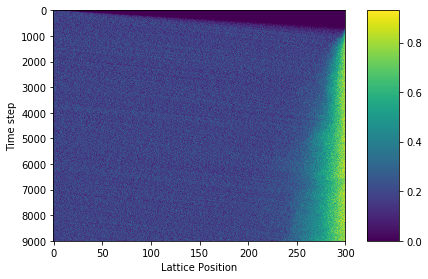

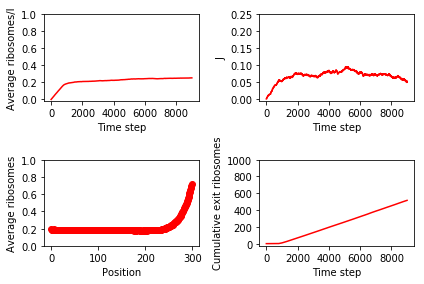

Average flux(J) = 0.06811691058215902
Average total exit ribosomes = 515.4040404039971


In [49]:
#LEdge mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.08,0.08,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


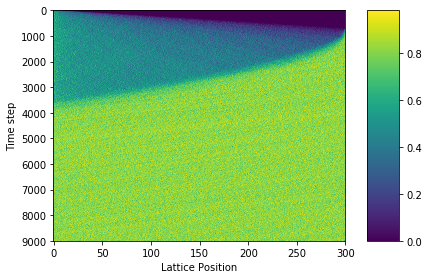

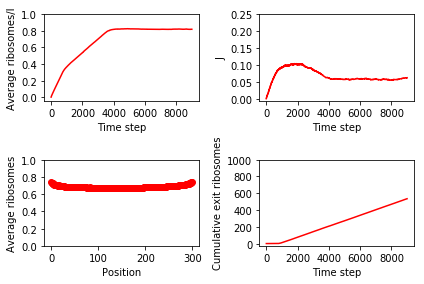

Average flux(J) = 0.08638165249985609
Average total exit ribosomes = 534.4444444443988


In [50]:
#HD mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.32,0.08,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


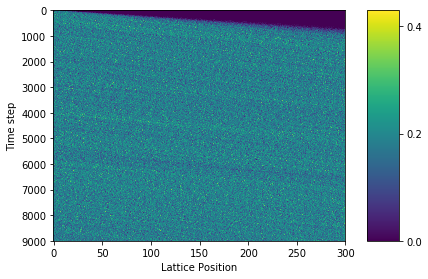

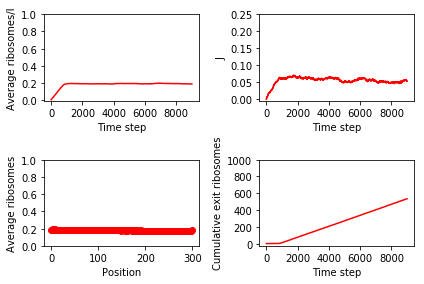

Average flux(J) = 0.05883663475345805
Average total exit ribosomes = 534.2727272726822


In [51]:
#LD mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.08,0.32,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


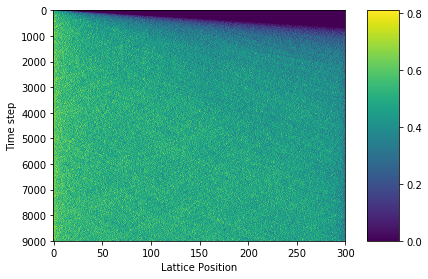

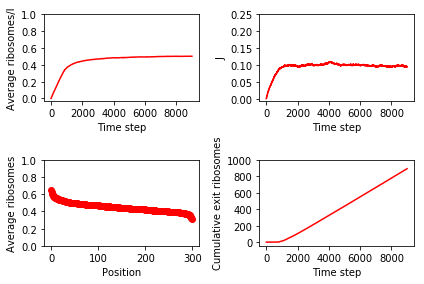

Average flux(J) = 0.09889265911977221
Average total exit ribosomes = 890.282828282774


In [52]:
#HD mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.32,0.32,0.4,9000,100)

In [53]:
def fmTASEP(L=10, a=0.3, b=0.3, P=0.3, timesteps=100, multi=10):
    """
    A basic TASEP(Totally Asimmetric Simple Exclusion Process) that creates a lattice(l) of lenght(L) 
    over time(timesteps) in an 2D array l. This function reads l at time t and edit time t+1.
    A ribosome or a 1 enter to l with (a) probability if the first space is empty, if there are a 1 in the first position
    is copied to t+1. The 1s moves over l with (P) probability only if there 0 in the next position so they can not move
    if there another 1 in front of them. Finally the 1s get out from l with (b) probability.
    The code is ejecuted (multi times where the final l is summed to (stored_l) and then this array is divided by m 
    to get the average ocupancy over all the positions.
    Show some relevant data.
    """
    stored_l=np.zeros((timesteps,L))
    stored_protein=np.zeros((timesteps))
    for m in range(multi):
        #lattice
        l = np.zeros((timesteps,L))
        protein=np.zeros((timesteps))
        l[0]=np.ones((L))
        #timesteps, iterate the function over time, use t0 and modify t1
        for t in range(timesteps-1):
            #income 
            if l[t,0] == 0:
                if np.random.uniform(0,1) <= a:
                    l[t+1,0] = 1
            #copy the ones that doest move from t to t+1            
            else:
                l[t+1,0] = 1        

            #jump, for each 1 in lattice that has a 0 at the righ throw the dice and see if it can jump
            for w in range(L-1): #L-1 to not outcome without b
                if l[t,w] == 1 and l[t,w+1] == 0:    
                    if np.random.uniform(0,1) <= P:
                            l[t+1,w] = 0
                            l[t+1,w+1] = 1
                    else:
                        l[t+1,w] = 1
                elif l[t,w] == 1 and l[t,w+1] == 1:
                     l[t+1,w] = 1

            #outcome  
            if l[t,-1] == 1:
                if np.random.uniform(0,1) <= b:
                    l[t+1,-1] = 0
                    protein[t] = 1
                else:
                    l[t+1,-1] = 1   
            #End TASEP loop
        stored_l = stored_l + l
        stored_protein =stored_protein + protein
        #stored_l/m is the new work array
    #End multi loop

    #Showing Data
    plt.imshow(stored_l/(m+1))
    plt.axes().set_aspect('auto')
    plt.xlabel('Lattice Position')
    plt.ylabel('Time step')
    #plt.suptitle('Average ribosomes per lattice position over time steps ')
    #color bar
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    plt.show()

    #Tell me what's going on fast
    plt.subplot(224)
    plt.plot(np.arange(len(np.cumsum (stored_protein/m,0))), np.cumsum (stored_protein/m,0), 'r-')
    plt.axis()
    plt.yticks([0,200,400,600,800,1000])
    plt.xlabel('Time step')
    plt.ylabel('Cumulative exit ribosomes')
    
    plt.subplot(223)
    plt.plot(np.arange(len(np.mean (stored_l/m,0))), np.mean (stored_l/m,0), 'ro')
    plt.axis()
    plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    plt.xlabel('Position')
    plt.ylabel('Average ribosomes')

    plt.subplot(221)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), np.mean (stored_l/m,1), 'r-')
    plt.axis()
    plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    plt.xlabel('Time step')
    plt.ylabel('Average ribosomes/l')
    #plt.suptitle('Whats going on')

    plt.subplot(222)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), P*(np.mean (l,1))*(1-np.mean (stored_l/m,1)), 'r-')
    plt.axis()
    plt.yticks([0.0,0.05,0.1,0.15,0.20,0.25])
    plt.xlabel('Time step')
    plt.ylabel('J')
    plt.tight_layout()
    plt.show()

    print("Average flux(J) =", P*np.mean (stored_l/m,(0,1))*(1-np.mean (stored_l/m,(0,1))))
    print("Average total exit ribosomes =", np.amax(np.cumsum (stored_protein/m,0)))

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


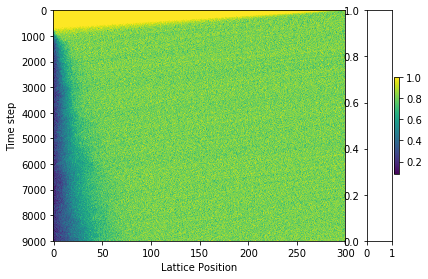

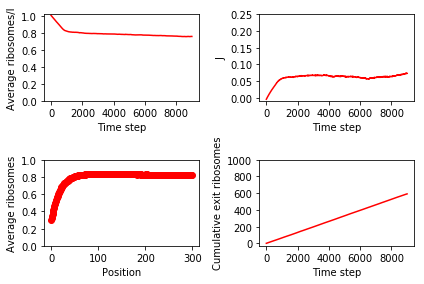

Average flux(J) = 0.0646852135562253
Average total exit ribosomes = 591.121212121157


In [54]:
#LEdge mTASEP(L,a,b,P,timesteps,multi)
fmTASEP(300,0.08,0.08,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


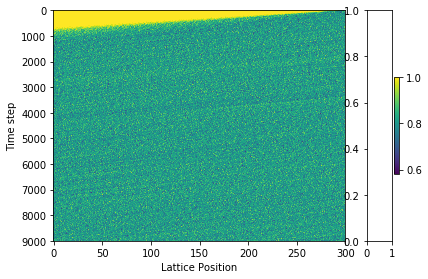

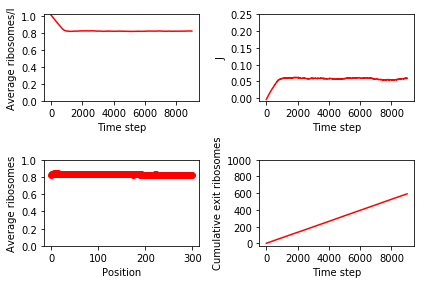

Average flux(J) = 0.05632310390270211
Average total exit ribosomes = 591.3838383837807


In [55]:
#HD mTASEP(L,a,b,P,timesteps,multi)
fmTASEP(300,0.32,0.08,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


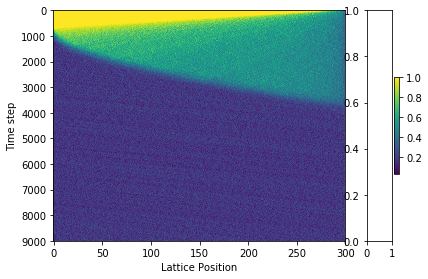

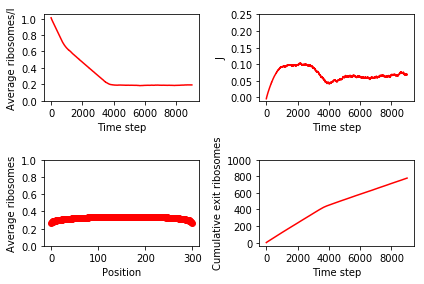

Average flux(J) = 0.08758165497715263
Average total exit ribosomes = 777.7070707069915


In [56]:
#LD mTASEP(L,a,b,P,timesteps,multi)
fmTASEP(300,0.08,0.32,0.4,9000,100)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


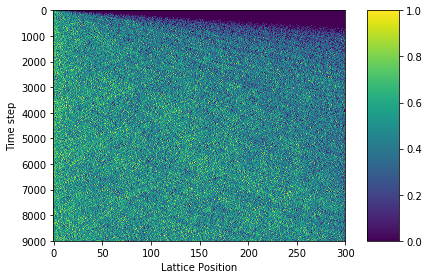

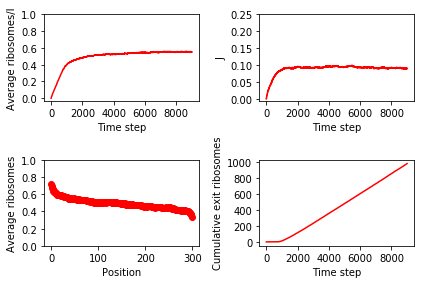

Average flux(J) = 0.09997205874509306
Average total exit ribosomes = 978.8888888888054


In [63]:
#MC mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.32,0.32,0.4,9000,10)

C:\Users\Vanargand\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


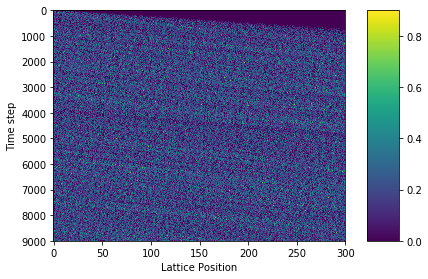

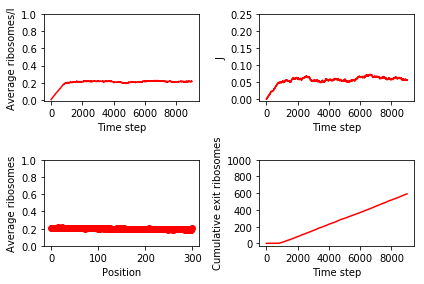

Average flux(J) = 0.06381383401539402
Average total exit ribosomes = 590.777777777738


In [61]:
#LD mTASEP(L,a,b,P,timesteps,multi)
mTASEP(300,0.08,0.32,0.4,9000,10)